# Proof of concept

Maxim Mangematin--Mathey & Jérôme Laporte
## Concensiousness

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut, cross_validate
from sklearn.metrics import recall_score

## Import Data

In [5]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_02.set")

print(data_loo.info)
print(data_tst.info)

Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_02.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq:

Get data and reduce them

In [6]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
csp = CSP(n_components=6, transform_into='average_power')

x_csp_average = csp.fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 1.7e-05 (2.2e-16 eps * 8 dim * 9.4e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 6.9e-06 (2.2e-16 eps * 8 dim * 3.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-1.2914822  -0.88632756 -0.51320967 -1.92866471 -1.53036937 -0.805537  ]
 [-0.89208774 -0.35877956 -1.4335205  -1.70896103 -1.26420468  0.06993202]
 [-1.28082043 -1.83111204 -1.7105161   0.31088006 -1.58945684 -2.07868669]
 ...
 [-0.04988749 -0.4538856  -1.01266451 -1.21901488 -1.06053201 -0.01805965]
 [ 0.7344182  -0.5214834  -0.56665054  0.05419206 -0.80953653 -1.49719722]
 [-1.56027926 -0.66720475 -0.7227454  -0.80674

In [7]:
x_tst = data_tst.get_data()
y_tst = data_tst.events[:,2] - 1

x_csp_average_test = csp.transform(x_tst)
x_csp_average_test

array([[ 1.28453985, -1.11264367, -0.51769977, -0.9126218 , -0.59385353,
        -0.87488333],
       [ 1.19902168, -0.39986554,  0.06249661, -0.29163824, -0.85538807,
        -0.72179319],
       [-0.10670904, -1.52099123, -0.81614722,  0.42354686, -0.60397908,
        -0.06435189],
       ...,
       [-1.57051966, -1.30172233, -1.46471422, -1.73299095, -1.51230562,
        -0.99641528],
       [-0.89278672, -1.5037334 , -1.82430643, -0.52081341, -0.21268499,
        -1.88205055],
       [-1.51984772, -0.85753073, -0.76879766, -0.68484572, -0.57817211,
        -1.71860077]])

transform then into dataframe

In [8]:
X2 = pd.DataFrame(x_csp_average)
X2

0         1         2         3         4         5
0   -1.291482 -0.886328 -0.513210 -1.928665 -1.530369 -0.805537
1   -0.892088 -0.358780 -1.433521 -1.708961 -1.264205  0.069932
2   -1.280820 -1.831112 -1.710516  0.310880 -1.589457 -2.078687
3   -0.129464 -0.964238 -1.835661 -1.822631 -2.110521 -0.088511
4   -0.592715 -0.540658 -1.404375 -0.711744 -1.574846 -0.282342
..        ...       ...       ...       ...       ...       ...
475 -1.597987 -0.666707 -1.505596  0.047970 -0.838545 -1.707438
476  0.084863 -1.426108 -1.131338 -0.817489 -0.749081 -1.787761
477 -0.049887 -0.453886 -1.012665 -1.219015 -1.060532 -0.018060
478  0.734418 -0.521483 -0.566651  0.054192 -0.809537 -1.497197
479 -1.560279 -0.667205 -0.722745 -0.806745 -0.043413 -1.770966

[480 rows x 6 columns]

In [22]:
y = y - 1

### Entrainement d'un seul model

In [9]:
classifier = RandomForestClassifier()
cv = LeaveOneOut()

score = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score["test_score"]

array([1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1.

prediction : 

In [11]:
pred = score["estimator"][0].predict(x_csp_average_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

<AxesSubplot:>

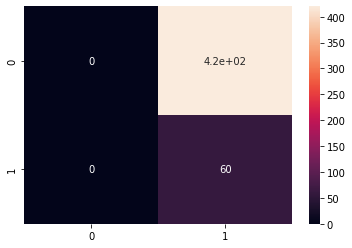

In [12]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

sns.heatmap(confusion_matrix(y_tst, pred), annot=True)

La meilleur facon de maximiser l'accuracy selon le modèle est de tout mettre dans la classe majoritaire

In [13]:
recall_score(y_pred=pred, y_true=y_tst)

1.0

on a donc un recall nul, on choisira d'observer cette valeur pour tester les modèles

#### Test sur le deuxième fichier 

0.125


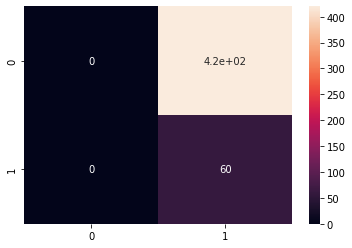

In [19]:
from sklearn.metrics import accuracy_score
max = 0
for estimator in score["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = accuracy_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

### Gradient bossting

In [23]:
from xgboost import XGBClassifier

boosted_tree = XGBClassifier()

score_tree = cross_validate(estimator=boosted_tree, cv=cv, return_estimator=True, X=x_csp_average, y=y, scoring="accuracy")
score_tree

{'fit_time': array([0.13764453, 0.04299927, 0.04551744, 0.04500842, 0.04651856,
        0.0430007 , 0.04100943, 0.03950691, 0.0369904 , 0.03751683,
        0.04100299, 0.04300547, 0.04200172, 0.0390048 , 0.03951192,
        0.03900075, 0.04051757, 0.06000233, 0.05852509, 0.05100942,
        0.04951072, 0.04300451, 0.05051279, 0.03900194, 0.03951907,
        0.03899741, 0.03851295, 0.03899837, 0.04301095, 0.03850913,
        0.03899908, 0.03951955, 0.03800178, 0.03851628, 0.04500008,
        0.04953337, 0.0439992 , 0.04201341, 0.04550815, 0.04300499,
        0.04151225, 0.05101156, 0.05251288, 0.0430088 , 0.04351187,
        0.04299903, 0.04452491, 0.04100156, 0.04352021, 0.04199982,
        0.04352689, 0.04000163, 0.04000711, 0.03850985, 0.03600311,
        0.03951478, 0.04000235, 0.04351783, 0.04699969, 0.04652333,
        0.03900051, 0.04001236, 0.04451323, 0.05101132, 0.04551125,
        0.05200934, 0.05600667, 0.11854553, 0.06253147, 0.04200673,
        0.03850985, 0.04000163, 0.04

0.84375


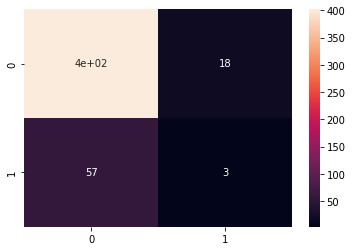

0.8520833333333333


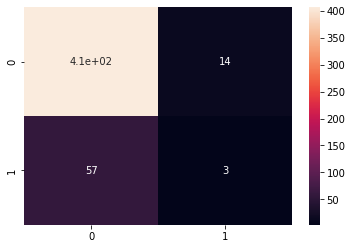

0.8583333333333333


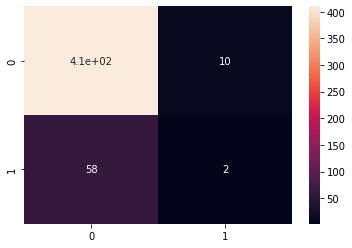

0.8604166666666667


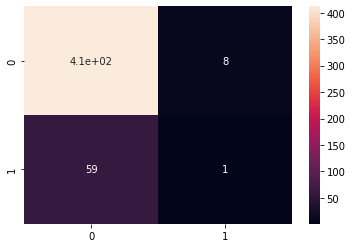

0.86875


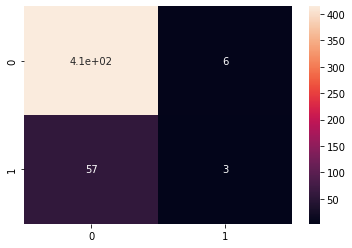

In [24]:


max = 0

for estimator in score_tree["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = accuracy_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

Conclusion

On remarque une bonne accuracy, mais celle ci est due à la mauvaise répartition des classes, il faut donc travailler sur ce point pour espérer avoir un meilleur recall

## Sampling

<AxesSubplot:>

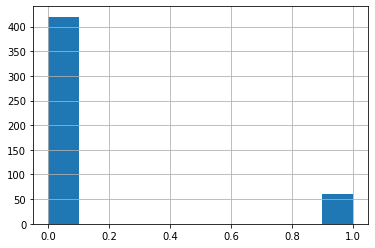

In [25]:
y = pd.Series(y)
y.hist()

On remaques que les classes sont très disproportionnées et que le modèles à donc des difficultés à apprendre

Nous allons maximiser le recall pour selectionner le meilleur model 

## SMOTE upper sampling

840


<AxesSubplot:>

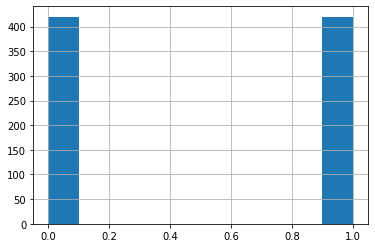

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_smote, y_smote = sm.fit_resample(X2, y)
print(len(y_smote))
y_smote.hist()

In [27]:
score_SMOTE = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=X_smote, y=y_smote, scoring="accuracy", n_jobs = -1)
score_SMOTE

{'fit_time': array([0.34958744, 0.37408948, 0.35909653, 0.34056878, 0.47063541,
        0.3401041 , 0.4226346 , 0.33558965, 0.32658076, 0.31158328,
        0.41010141, 0.43209743, 0.29457474, 0.37010074, 0.36809182,
        0.39609909, 0.2020402 , 0.20504904, 0.3180809 , 0.39557838,
        0.34656906, 0.32756901, 0.38109517, 0.44161248, 0.44109249,
        0.43461227, 0.31356335, 0.43108273, 0.3475647 , 0.43459392,
        0.42208457, 0.46961403, 0.34907365, 0.45860839, 0.34208846,
        0.40909147, 0.54912901, 0.45260739, 0.52261996, 0.4520967 ,
        0.46710014, 0.44311237, 0.45611572, 0.42661786, 0.35157824,
        0.39310455, 0.32057309, 0.33456445, 0.37809086, 0.32709384,
        0.39209747, 0.36657667, 0.30057788, 0.3075738 , 0.33010268,
        0.30359054, 0.34658909, 0.34558153, 0.30657458, 0.36658645,
        0.31158018, 0.30057359, 0.30758262, 0.30158305, 0.36958599,
        0.31709599, 0.32358193, 0.31857324, 0.35458469, 0.31157351,
        0.30657387, 0.31057811, 0.27

0.18333333333333332


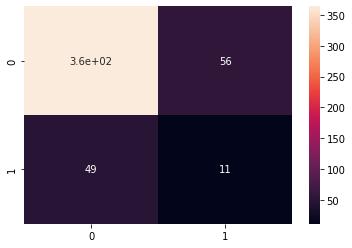

0.2


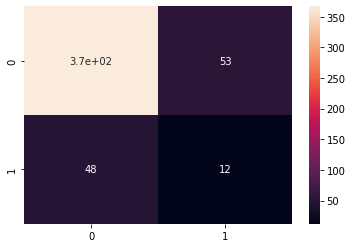

0.21666666666666667


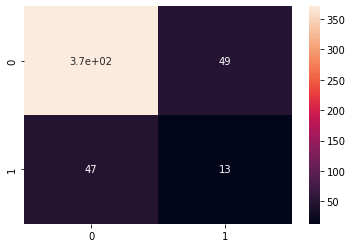

In [ ]:
max = 0

for estimator in score_SMOTE["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

# Near Miss undersampler

In [28]:
from imblearn.under_sampling import NearMiss

u_s = NearMiss()
X_nm, y_nm = u_s.fit_resample(X2, y)

In [29]:
len(y_nm)

120

In [30]:
score_us = cross_validate(estimator=classifier, cv=cv, return_estimator=True, X=X_smote, y=y_smote, scoring="accuracy", n_jobs = -1)
score_us

{'fit_time': array([0.31956649, 0.37656713, 0.39808893, 0.29656601, 0.32155609,
        0.38157439, 0.40509629, 0.33357   , 0.33209705, 0.30357051,
        0.30656791, 0.33557129, 0.32556581, 0.31857777, 0.33209276,
        0.31956744, 0.32058764, 0.33760452, 0.33611512, 0.40111947,
        0.39012146, 0.34860253, 0.36512184, 0.38812304, 0.3330853 ,
        0.306566  , 0.31156874, 0.3145647 , 0.29556656, 0.29156661,
        0.32809401, 0.29556966, 0.34709072, 0.33757496, 0.34057713,
        0.32556868, 0.33157206, 0.32957268, 0.30157208, 0.32108188,
        0.31457496, 0.3130815 , 0.32456779, 0.35908461, 0.37107944,
        0.33756518, 0.32056689, 0.33856034, 0.30856895, 0.30457044,
        0.32458186, 0.29457355, 0.31458044, 0.30609035, 0.32457209,
        0.31957364, 0.3055799 , 0.36057115, 0.31057906, 0.30556583,
        0.33157778, 0.33211184, 0.31559038, 0.31859207, 0.32559276,
        0.33259416, 0.35159492, 0.31559992, 0.29156947, 0.2945652 ,
        0.29256439, 0.30709219, 0.33

0.15


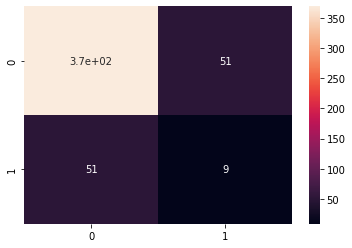

0.2


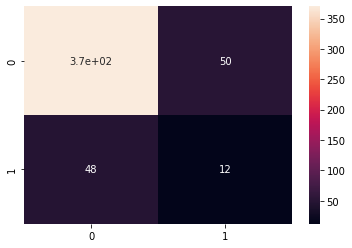

0.21666666666666667


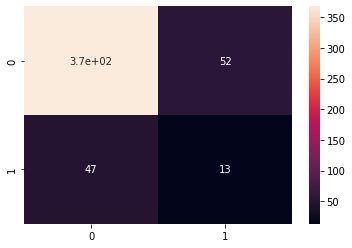

0.23333333333333334


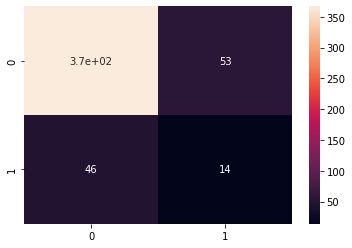

In [31]:

max = 0
for estimator in score_us["estimator"]:
    pred = estimator.predict(x_csp_average_test)
    rec = recall_score(y_pred=pred, y_true=y_tst)
    if rec > max:
        print(rec)
        max = rec
        max_estimator = pred
        sns.heatmap(confusion_matrix(y_tst, pred), annot=True)
        plt.show()

# Conclusion

Comme nous sommes limités à uniquement 1 fichier, nous ne pouvons pas vraiment aller plus loins. Néanmois, les solutions futures serait d'agreger plusieurs fichiers et de faire le l'undersamplig sur les données (comme ceux sont celles qui ont eu les meilleurs résultats)

les voici : 

Pour une Random Forest entrainer et tester sur la patient 11

In [32]:


final_model = max_estimator

final_predictions = estimator.predict(x_csp_average_test)

<AxesSubplot:>

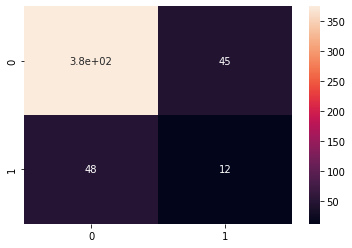

In [33]:
sns.heatmap(confusion_matrix(y_tst, final_predictions), annot=True)

In [34]:
print("accuracy : ", accuracy_score(y_tst, final_predictions))

accuracy :  0.80625
